In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('genderIndicators_worldBank_highinc.csv')
df = df.dropna(subset=['SH.STA.MMRT'])

# Replace nans with 0
df.fillna(0, inplace=True)
df

,Country,Year,IC.FRM.FEMM.ZS,IC.FRM.FEMO.ZS,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ENR.PRIM.FM.ZS,...,SP.POP.AG03.FE.IN,SP.POP.AG03.MA.IN,SP.POP.AG04.FE.IN,SP.POP.AG04.MA.IN,SP.POP.AG05.FE.IN,SP.POP.AG05.MA.IN,SP.RUR.TOTL.FE.ZS,SP.RUR.TOTL.MA.ZS,SP.URB.TOTL.FE.ZS,SP.URB.TOTL.MA.ZS
198,ARE,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,25227.0,26903.0,23592.5,25433.0,22437.5,24447.0,6.642432,13.11963,25.842697,54.395241
199,ARE,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,25867.0,27547.5,25282.0,27094.5,23862.5,25869.0,0.000000,0.00000,0.000000,0.000000
200,ARE,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,26430.5,28097.5,25877.5,27662.5,25338.0,27289.0,0.000000,0.00000,0.000000,0.000000
201,ARE,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,26913.0,28568.5,26394.5,28140.5,25888.5,27780.0,0.000000,0.00000,0.000000,0.000000
202,ARE,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,27309.5,28960.0,26828.5,28543.5,26359.5,28185.5,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,USA,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99833,...,1969807.0,2062236.5,1980703.5,2075242.0,1994372.0,2093948.5,0.000000,0.00000,0.000000,0.000000
6298,USA,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99234,...,1978766.0,2071786.0,1981373.5,2074372.5,1991103.5,2086558.0,0.000000,0.00000,0.000000,0.000000
6299,USA,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99884,...,1990342.5,2080863.0,1991357.0,2084866.5,1991857.0,2085390.0,0.000000,0.00000,0.000000,0.000000
6300,USA,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00705,...,1982090.0,2074245.0,2004235.0,2094980.0,2003251.5,2097239.5,0.000000,0.00000,0.000000,0.000000


In [6]:
# First need to encode the country 

# Create a LabelEncoder instance for each categorical column
country_encoder = LabelEncoder()

# Encode the categorical columns
data_encoded = df.copy(deep = True)
data_encoded['Country'] = country_encoder.fit_transform(data_encoded['Country'])

In [7]:
data_encoded

,Country,Year,IC.FRM.FEMM.ZS,IC.FRM.FEMO.ZS,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ENR.PRIM.FM.ZS,...,SP.POP.AG03.FE.IN,SP.POP.AG03.MA.IN,SP.POP.AG04.FE.IN,SP.POP.AG04.MA.IN,SP.POP.AG05.FE.IN,SP.POP.AG05.MA.IN,SP.RUR.TOTL.FE.ZS,SP.RUR.TOTL.MA.ZS,SP.URB.TOTL.FE.ZS,SP.URB.TOTL.MA.ZS
198,0,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,25227.0,26903.0,23592.5,25433.0,22437.5,24447.0,6.642432,13.11963,25.842697,54.395241
199,0,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,25867.0,27547.5,25282.0,27094.5,23862.5,25869.0,0.000000,0.00000,0.000000,0.000000
200,0,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,26430.5,28097.5,25877.5,27662.5,25338.0,27289.0,0.000000,0.00000,0.000000,0.000000
201,0,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,26913.0,28568.5,26394.5,28140.5,25888.5,27780.0,0.000000,0.00000,0.000000,0.000000
202,0,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,27309.5,28960.0,26828.5,28543.5,26359.5,28185.5,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,54,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99833,...,1969807.0,2062236.5,1980703.5,2075242.0,1994372.0,2093948.5,0.000000,0.00000,0.000000,0.000000
6298,54,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99234,...,1978766.0,2071786.0,1981373.5,2074372.5,1991103.5,2086558.0,0.000000,0.00000,0.000000,0.000000
6299,54,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99884,...,1990342.5,2080863.0,1991357.0,2084866.5,1991857.0,2085390.0,0.000000,0.00000,0.000000,0.000000
6300,54,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00705,...,1982090.0,2074245.0,2004235.0,2094980.0,2003251.5,2097239.5,0.000000,0.00000,0.000000,0.000000


## Random Forest

In [8]:
# pull out Maternal Mortality as the predictor variable 
X = data_encoded.drop(columns='SH.STA.MMRT')
y = data_encoded['SH.STA.MMRT']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # should explore adjusting hyperparameters 

# Train the model on the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
y_pred = rf_regressor.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 13.710458441558444
R-squared (R2): 0.9802166869248983


### A look at feature importance 

In [15]:
feature_importance = rf_regressor.feature_importances_

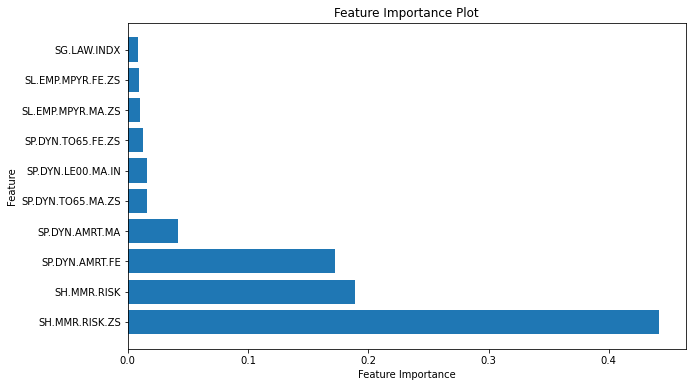

In [21]:
# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1][:10] # pull only the top 10 features
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = feature_importance[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances)
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()


### Top features explained

SH.MMR.RISK.ZS - Lifetime risk of maternal death (%)    
SH.MMR.RISK - 	Lifetime risk of maternal death (1 in: rate varies by country)   
SP.DYN.AMRT.FE - Mortality rate, adult, female (per 1,000 female adults)   
SP.DYN.AMRT.MA - Mortality rate, adult, male (per 1,000 male adults)   
SP.DYN.TO65.MA.ZS - Survival to age 65, male (% of cohort)   